Задача 3 

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_wine

In [144]:
data = load_wine()

In [145]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [146]:
data = pd.DataFrame(data = np.c_[data['data'],data['target']], columns = data['feature_names']+['target'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [147]:
(data.isnull() | data.empty | data.isna()).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [148]:
X = load_wine()['data']

In [149]:
y = load_wine()['target']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=27)

разглеждаме 2 характеристики : алкохол и ябълчена киселина спрямо target-а

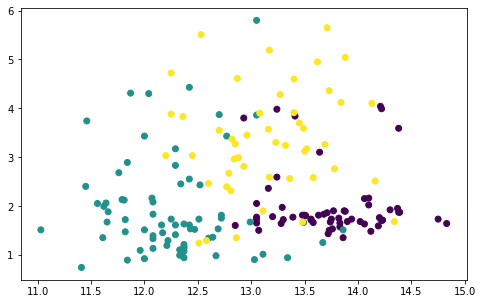

In [151]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:,1], c=y)

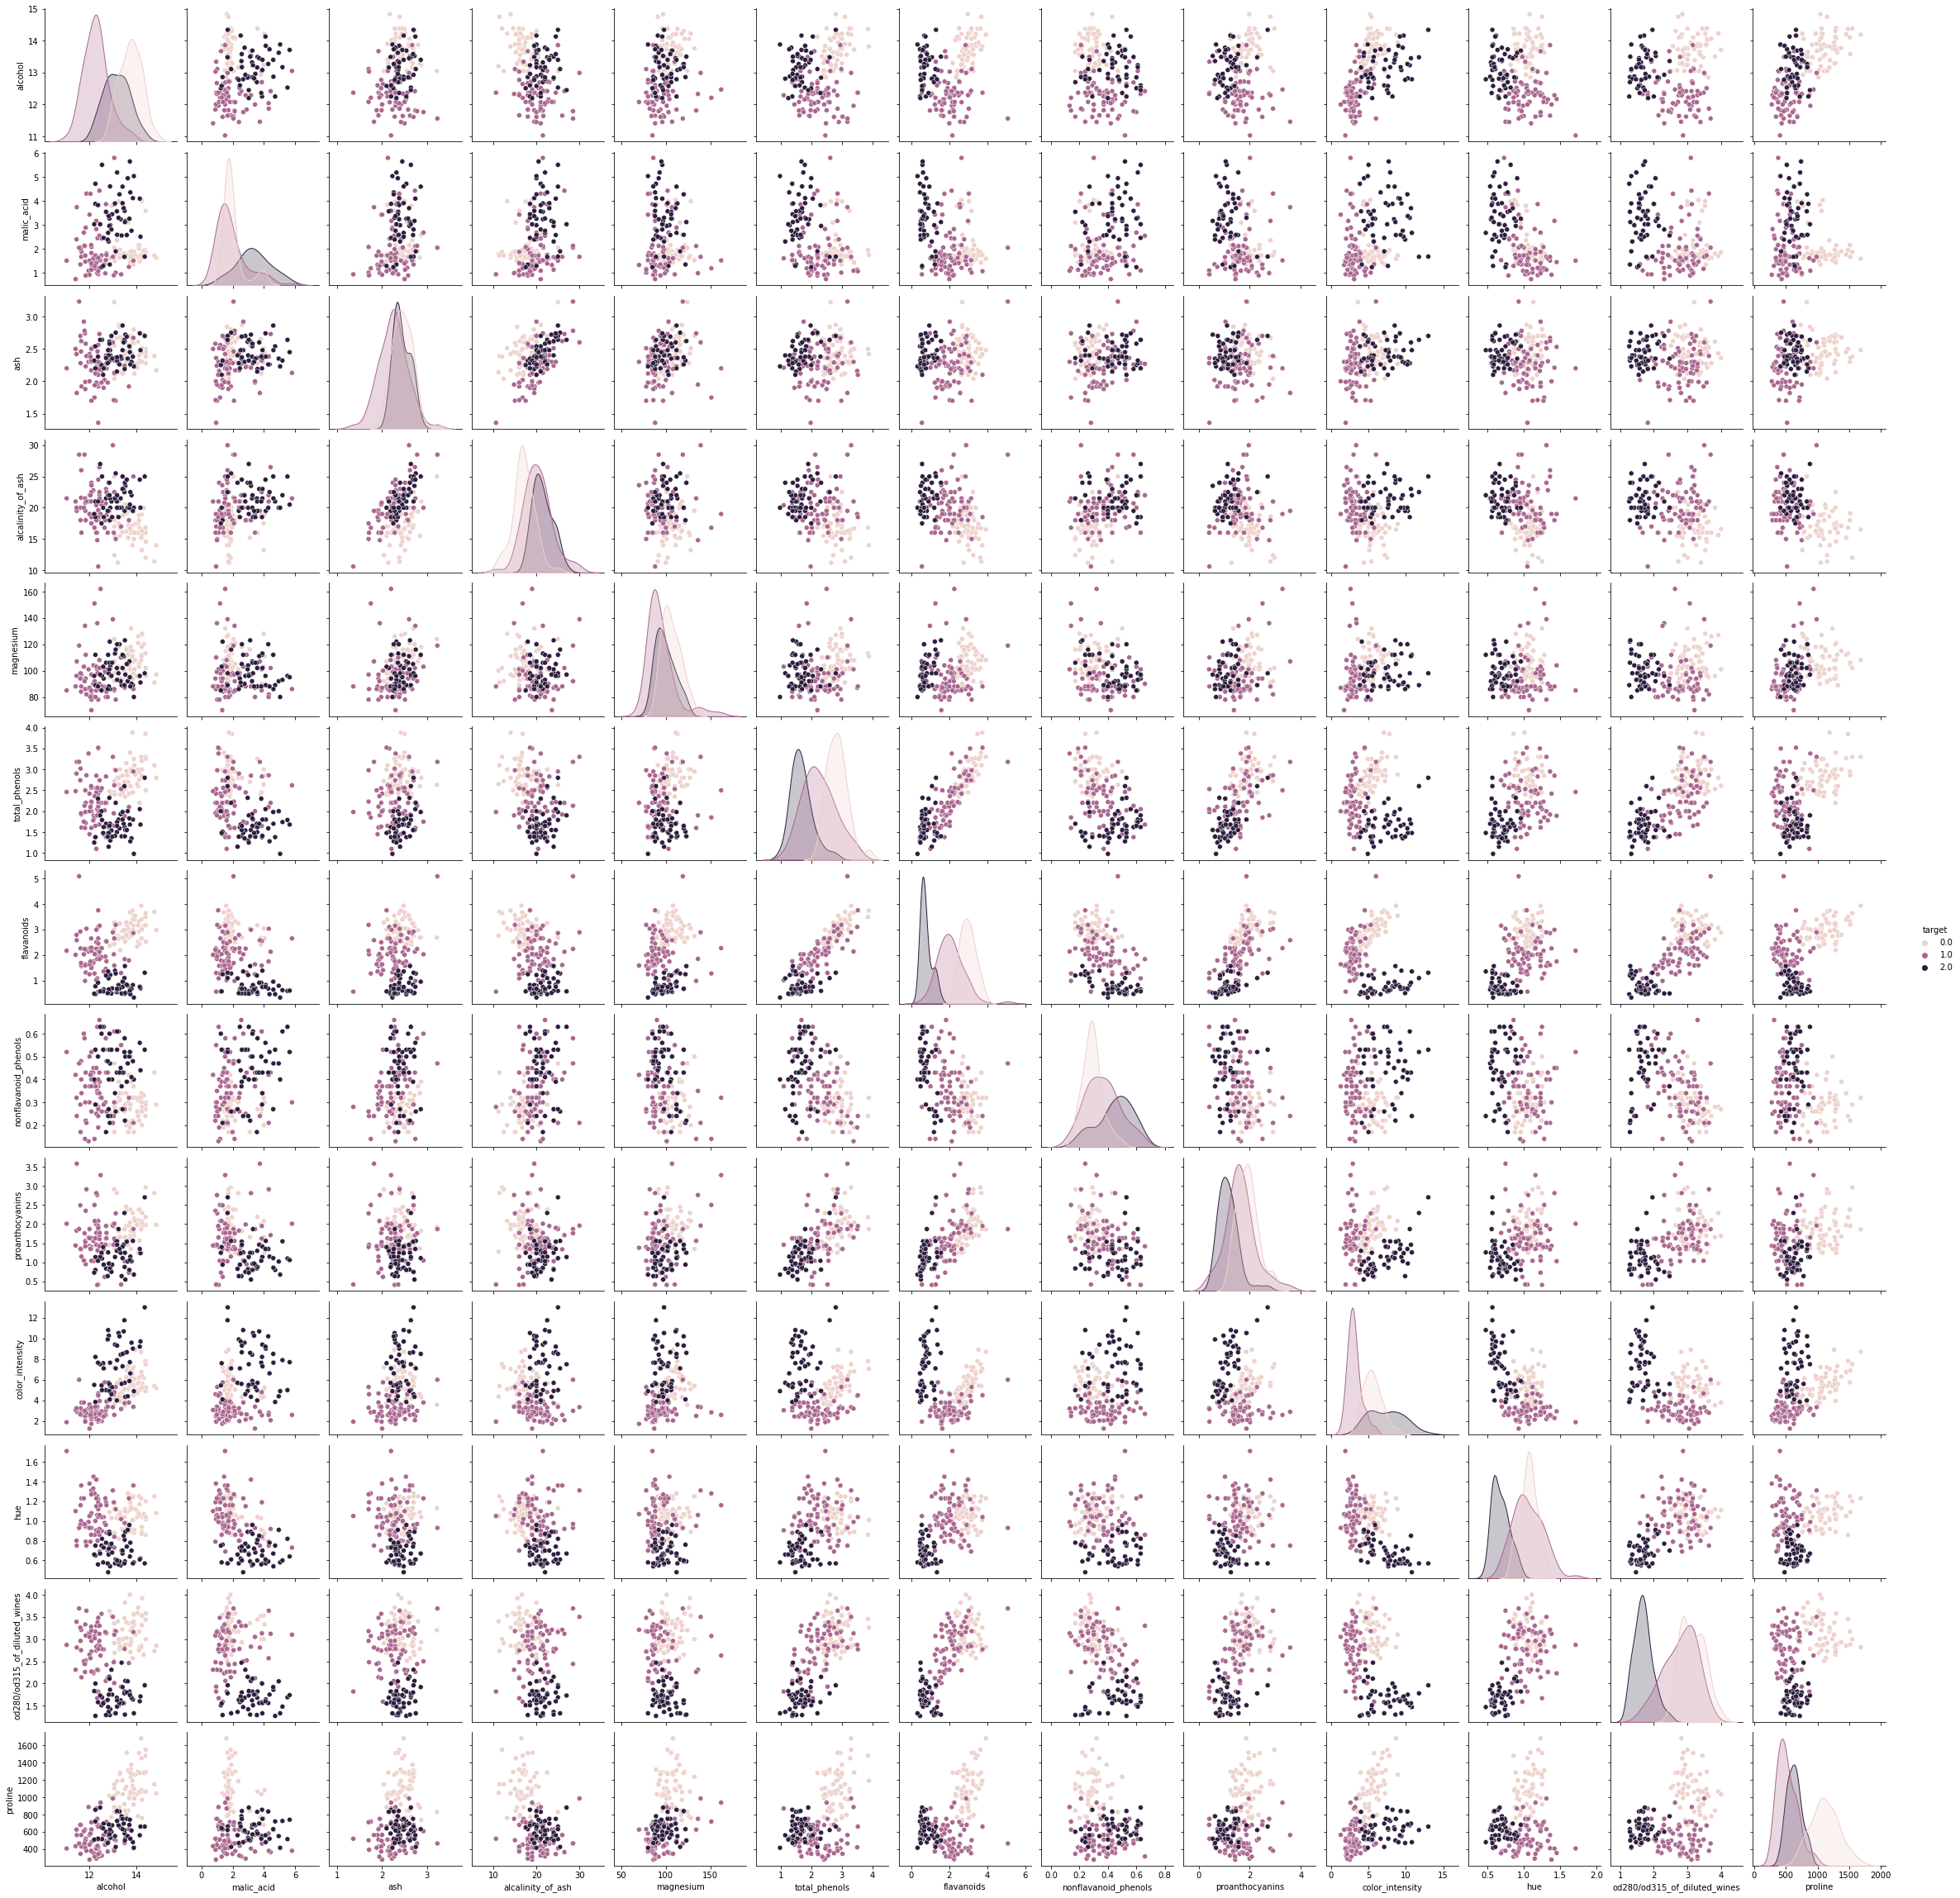

In [152]:
import seaborn 
seaborn.pairplot(data, hue = 'target')
plt.show()

Decision tree

In [153]:
paramsDT = {'criterion': ['gini', 'entropy'],
           'max_depth': [1, 2, 3, 4, 5, 7], 
           'min_samples_leaf': [5, 10, 15, 20, 22]}

dT = GridSearchCV(DecisionTreeClassifier(), paramsDT, cv=5)
dT.fit(X_train, y_train)
best_DT = dT.best_estimator_
print(best_DT)
print(best_DT.score(X_train, y_train))

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)
0.971830985915493


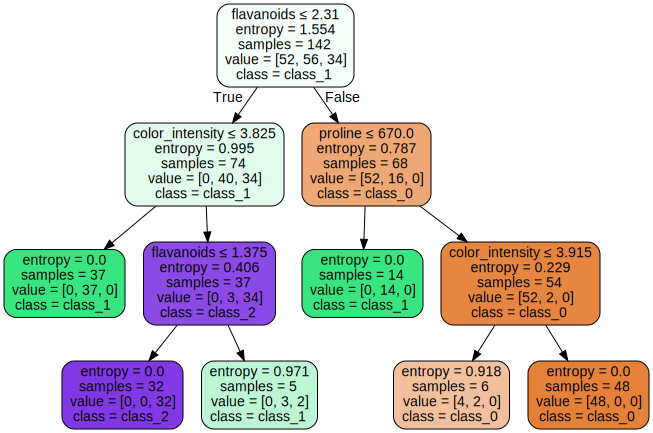

In [154]:
wine = load_wine()
dot_data = export_graphviz(best_DT, out_file=None, 
                     feature_names = wine.feature_names,  
                     class_names = wine.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Bagging 

RandomForest

In [155]:
paramsRF= {'n_estimators': [50, 70, 100, 150, 200],
           'max_features': ['sqrt',7]}

rF = GridSearchCV(RandomForestClassifier(n_jobs = -1), paramsRF, cv=5)
rF.fit(X_train, y_train)
best_RF = rF.best_estimator_
print(best_RF)
print(best_RF.score(X_train, y_train))
best_RF.feature_importances_

RandomForestClassifier(max_features='sqrt', n_estimators=50, n_jobs=-1)
1.0


array([0.12148294, 0.01572917, 0.01297705, 0.01189189, 0.03493445,
       0.0792741 , 0.16450345, 0.01426557, 0.02029373, 0.14327675,
       0.07621122, 0.11839232, 0.18676737])

ExtraTrees

In [156]:
paramsET={'n_estimators': [50, 70, 100, 150, 200],
           'max_features': ['sqrt', 7]}

eT = GridSearchCV(ExtraTreesClassifier(n_jobs = -1), paramsET, cv=5)
eT.fit(X_train,y_train)
best_ET = eT.best_estimator_
print(best_ET)
best_ET.score(X_train,y_train)

ExtraTreesClassifier(max_features='sqrt', n_estimators=50, n_jobs=-1)


1.0

Boosting

AdaBoost

In [157]:
paramsAB = {'base_estimator__max_depth': [1, 2, 3, 4],
            'n_estimators': [50, 70, 100, 150, 200]}
 
aB = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier()),paramsAB, cv = 5)
aB.fit(X_train,y_train)
best_AB = aB.best_estimator_
print(best_AB.get_params())
print(best_AB.score(X_train,y_train))

{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 2, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 1.0, 'n_estimators': 70, 'random_state': None}
1.0


GradientBoost

In [158]:
paramsGB = {'learning_rate':[0.1, 0.2, 0.3, 0.4],
            'n_estimators': [50, 70, 100, 150, 200]}
 
gB = GridSearchCV(GradientBoostingClassifier(),paramsGB, cv = 5)
gB.fit(X_train,y_train)
best_GB = gB.best_estimator_
print(best_GB.get_params())
print(best_GB.score(X_train,y_train))

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
1.0


XGBoost

In [159]:
paramsXGB = {'learning_rate':[0.1, 0.2, 0.3, 0.4],
            'n_estimators': [50, 70, 100, 150, 200]}
 
xgB = GridSearchCV(XGBClassifier(use_label_encoder=False,eval_metric='mlogloss'),paramsXGB, cv = 5)
xgB.fit(X_train,y_train)
best_XGB = xgB.best_estimator_
print(best_XGB.get_params())
print(best_XGB.score(X_train,y_train))

{'objective': 'multi:softprob', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 50, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': None, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None, 'eval_metric': 'mlogloss'}
1.0


Избраният модел върху тестовите данни


Получават се по-точни модели с bagging алгоритмите с тези данни

In [160]:
print(best_RF.score(X_test,y_test))
print(best_ET.score(X_test,y_test))


1.0
1.0


In [161]:
print(classification_report(best_RF.predict(X_test), y_test))
print(classification_report(best_ET.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [162]:
print(confusion_matrix(best_RF.predict(X_test), y_test))
print(confusion_matrix(best_ET.predict(X_test), y_test))



[[ 7  0  0]
 [ 0 15  0]
 [ 0  0 14]]
[[ 7  0  0]
 [ 0 15  0]
 [ 0  0 14]]


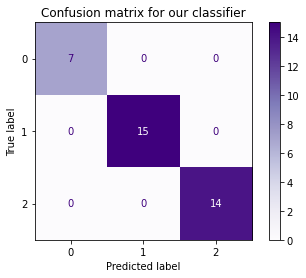

In [165]:
matrix = plot_confusion_matrix(best_RF, X_test, y_test, cmap = plt.cm.Purples)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()